<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.742382,95.774751,-258.219294,-107.702161,-72.506830,-35.195331
1,0.0,1.0,45.588333,67.139211,-555.929671,-433.202127,31.165304,-464.367431
2,0.0,2.0,84.986199,48.769242,31.892393,175.647834,282.356215,-106.708380
3,0.0,3.0,51.371379,38.882319,-36.247249,64.006449,156.986466,-92.980017
4,0.0,4.0,27.973498,48.646858,61.975823,148.596179,11.792542,136.803637
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.912803,27.282598,128.768347,214.963748,115.527719,99.436029
19996,999.0,16.0,46.752251,80.867351,526.476746,664.096348,356.751727,307.344622
19997,999.0,17.0,73.420117,92.268006,-401.288022,-225.599899,270.577615,-496.177514
19998,999.0,18.0,46.044505,21.383123,6.898101,84.325729,104.713581,-20.387852


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.742382,95.774751,-258.219294,-107.702161,-72.506830,-35.195331
1,0.0,1.0,45.588333,67.139211,-555.929671,-433.202127,31.165304,-464.367431
2,0.0,2.0,84.986199,48.769242,31.892393,175.647834,282.356215,-106.708380
3,0.0,3.0,51.371379,38.882319,-36.247249,64.006449,156.986466,-92.980017
4,0.0,4.0,27.973498,48.646858,61.975823,148.596179,11.792542,136.803637
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.912803,27.282598,128.768347,214.963748,115.527719,99.436029
19996,999.0,16.0,46.752251,80.867351,526.476746,664.096348,356.751727,307.344622
19997,999.0,17.0,73.420117,92.268006,-401.288022,-225.599899,270.577615,-496.177514
19998,999.0,18.0,46.044505,21.383123,6.898101,84.325729,104.713581,-20.387852


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    44.742382  95.774751 -258.219294 -107.702161  -72.506830   
      1.0    45.588333  67.139211 -555.929671 -433.202127   31.165304   
      2.0    84.986199  48.769242   31.892393  175.647834  282.356215   
      3.0    51.371379  38.882319  -36.247249   64.006449  156.986466   
      4.0    27.973498  48.646858   61.975823  148.596179   11.792542   
...                ...        ...         ...         ...         ...   
999.0 15.0   48.912803  27.282598  128.768347  214.963748  115.527719   
      16.0   46.752251  80.867351  526.476746  664.096348  356.751727   
      17.0   73.420117  92.268006 -401.288022 -225.599899  270.577615   
      18.0   46.044505  21.383123    6.898101   84.325729  104.713581   
      19.0   31.020087  50.123809  -56.805431   34.338466  304.374477   

                  e_hat  
rep   index              
0.0   0.0    -35.195331  
      1.0   -464.367431  
      2.0   -106.708380  
      3.0    -92.980017  
      4.0    136.803637  
...                 ...  
999.0 15.0    99.436029  
      16.0   307.344622  
      17.0  -496.177514  
      18.0   -20.387852  
      19.0  -270.036011  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    44.742382  95.774751 -258.219294 -107.702161  -72.506830   
      1.0    45.588333  67.139211 -555.929671 -433.202127   31.165304   
      2.0    84.986199  48.769242   31.892393  175.647834  282.356215   
      3.0    51.371379  38.882319  -36.247249   64.006449  156.986466   
      4.0    27.973498  48.646858   61.975823  148.596179   11.792542   
...                ...        ...         ...         ...         ...   
999.0 15.0   48.912803  27.282598  128.768347  214.963748  115.527719   
      16.0   46.752251  80.867351  526.476746  664.096348  356.751727   
      17.0   73.420117  92.268006 -401.288022 -225.599899  270.577615   
      18.0   46.044505  21.383123    6.898101   84.325729  104.713581   
      19.0   31.020087  50.123809  -56.805431   34.338466  304.374477   

                  e_hat  
rep   index              
0.0   0.0    -35.195331  
      1.0   -464.367431  
      2.0   -106.708380  
      3.0    -92.980017  
      4.0    136.803637  
...                 ...  
999.0 15.0    99.436029  
      16.0   307.344622  
      17.0  -496.177514  
      18.0   -20.387852  
      19.0  -270.036011  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.742382,95.774751,-258.219294,-107.702161,-72.506830,-35.195331
1,0.0,1.0,45.588333,67.139211,-555.929671,-433.202127,31.165304,-464.367431
2,0.0,2.0,84.986199,48.769242,31.892393,175.647834,282.356215,-106.708380
3,0.0,3.0,51.371379,38.882319,-36.247249,64.006449,156.986466,-92.980017
4,0.0,4.0,27.973498,48.646858,61.975823,148.596179,11.792542,136.803637
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.912803,27.282598,128.768347,214.963748,115.527719,99.436029
19996,999.0,16.0,46.752251,80.867351,526.476746,664.096348,356.751727,307.344622
19997,999.0,17.0,73.420117,92.268006,-401.288022,-225.599899,270.577615,-496.177514
19998,999.0,18.0,46.044505,21.383123,6.898101,84.325729,104.713581,-20.387852


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    44.742382  95.774751 -258.219294 -107.702161  -72.506830   
      1.0    45.588333  67.139211 -555.929671 -433.202127   31.165304   
      2.0    84.986199  48.769242   31.892393  175.647834  282.356215   
      3.0    51.371379  38.882319  -36.247249   64.006449  156.986466   
      4.0    27.973498  48.646858   61.975823  148.596179   11.792542   
...                ...        ...         ...         ...         ...   
999.0 15.0   48.912803  27.282598  128.768347  214.963748  115.527719   
      16.0   46.752251  80.867351  526.476746  664.096348  356.751727   
      17.0   73.420117  92.268006 -401.288022 -225.599899  270.577615   
      18.0   46.044505  21.383123    6.898101   84.325729  104.713581   
      19.0   31.020087  50.123809  -56.805431   34.338466  304.374477   

                  e_hat  
rep   index              
0.0   0.0    -35.195331  
      1.0   -464.367431  
      2.0   -106.708380  
      3.0    -92.980017  
      4.0    136.803637  
...                 ...  
999.0 15.0    99.436029  
      16.0   307.344622  
      17.0  -496.177514  
      18.0   -20.387852  
      19.0  -270.036011  

[20000 rows x 6 columns]

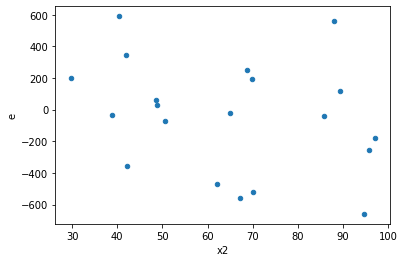

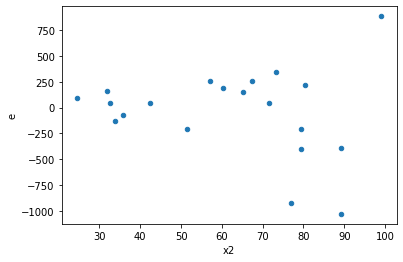

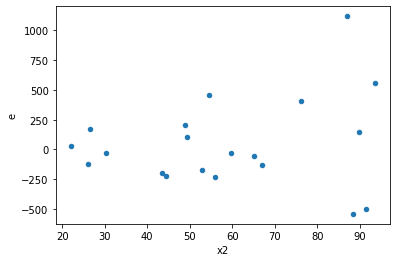

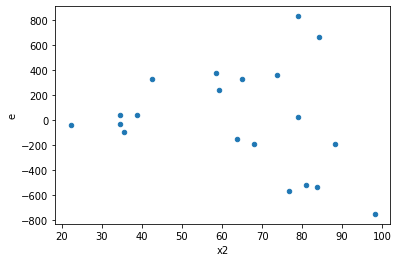

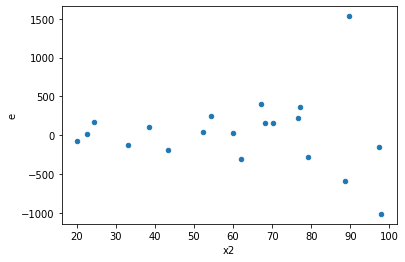

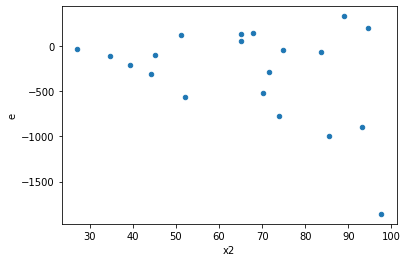

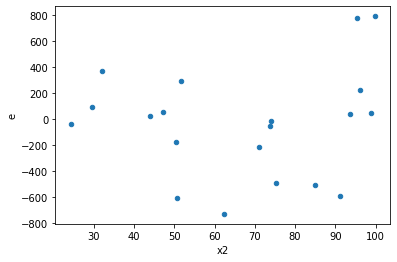

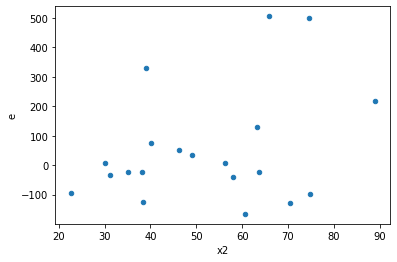

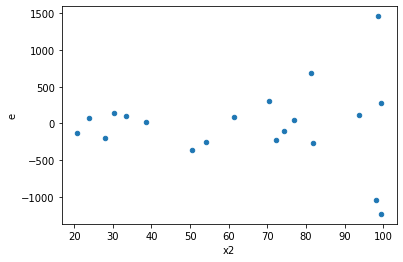

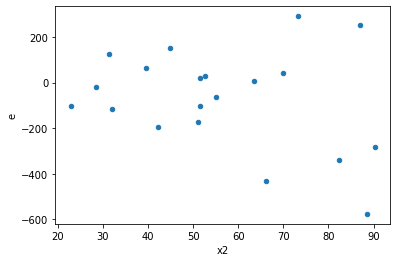

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,63089.686289288,1566425.2988409735,10514.947714881333,261070.88314016224,24.828547912861264,0.0010943612557758886,0.9994528193721121,0.0005471806278879443,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,160944.38286888512,479832.2685707701,26824.063811480853,79972.04476179501,2.9813545525330327,0.20950860851761877,0.8952456957411906,0.10475430425880938,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,729466.4074026449,2024369.500121497,121577.73456710747,337394.9166869162,2.7751373875179732,0.23968031714084792,0.880159841429576,0.11984015857042396,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,260137.26002122866,947957.964857551,43356.21000353811,157992.99414292516,3.6440683844374786,0.14073975714805909,0.9296301214259705,0.07036987857402954,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,89166.0167102007,466725.9789075629,14861.00278503345,77787.66315126048,5.234348198198349,0.06395373076998334,0.9680231346150083,0.03197686538499167,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,545904.9580753049,4006428.6119770147,90984.15967921748,667738.1019961691,7.339058846621334,0.028582704926273017,0.9857086475368635,0.014291352463136509,Reject005=0 : Heteroscedasticity
10.0,6.0,6.0,697043.3721903337,866184.7999721116,116173.8953650556,144364.13332868528,1.2426555283787886,0.7987026795318444,0.6006486602340778,0.3993513397659222,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,16069.547016827575,2684534.9607322696,2678.257836137929,447422.4934553783,167.05728904001467,4.176125427024502e-06,0.9999979119372865,2.088062713512251e-06,Reject005=0 : Heteroscedasticity
14.0,6.0,6.0,160917.15809604354,708250.1056744047,26819.52634934059,118041.68427906744,4.401333667921757,0.09428271234591912,0.9528586438270404,0.04714135617295956,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1055576.6294445086,723809.4508954077,175929.43824075142,120634.90848256795,0.6857005268071428,0.65842321261937,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,2056984.1575048412,216322.34890206307,342830.69291747356,36053.72481701051,0.10516481039137703,0.01486682642399877,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,63089.686289288,1566425.2988409735,10514.947714881333,261070.88314016224,24.828547912861264,0.0010943612557758886,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,160944.38286888512,479832.2685707701,26824.063811480853,79972.04476179501,2.9813545525330327,0.20950860851761877,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,729466.4074026449,2024369.500121497,121577.73456710747,337394.9166869162,2.7751373875179732,0.23968031714084792,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,1345908.5336772418,464108.9788073354,224318.08894620696,77351.49646788924,0.3448295089855133,0.22078565887344143,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,260137.26002122866,947957.964857551,43356.21000353811,157992.99414292516,3.6440683844374786,0.14073975714805909,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,89166.0167102007,466725.9789075629,14861.00278503345,77787.66315126048,5.234348198198349,0.06395373076998334,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,545904.9580753049,4006428.6119770147,90984.15967921748,667738.1019961691,7.339058846621334,0.028582704926273017,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      610
Reject005=0 : Heteroscedasticity    390
Name: Result_test, dtype: int64